# 2.12 Georgia on my mind




In [1]:
from pyknon.genmidi import Midi
from pyknon.music import Rest, Note, NoteSeq
from music_generation import *
import numpy as np
import matplotlib.pyplot as plt

### Chord definitions

In [2]:
C     = np.array([ 0, 4, 7])
Cm    = np.array([ 0, 3, 7])
Cdim  = np.array([ 0, 3, 6])

CM7   = np.array([ 0, 4, 7, 11])
C7    = np.array([ 0, 4, 7, 10])
Cm7   = np.array([ 0, 3, 7, 10])
Cdim7 = np.array([ 0, 3, 6, 10])
Cdim6 = np.array([ 0, 3, 6, 9 ])
C6    = np.array([ 0, 4, 7, 9 ]) # inversion of Am7
Cm6   = np.array([ 0, 3, 7, 9 ])

Csus4 = np.array([ 0, 5, 7])
Csus2 = np.array([ 0, 2, 7])
Csus47= np.array([ 0, 5, 7, 10])

P = np.array([ 0,7])  # Power chord (Perfect unison, Perfect fifth)
B = np.array([ 0])    # Bass (Perfect unison)

major = np.array([ 0, 2, 4, 5, 7, 9, 11])
minor = np.array([ 0, 2, 3, 5, 7, 8, 10])  
blues = np.array([ 0, 3, 5, 6, 7, 10])

## tune_211_A  
For this tune I use the chord sequence of a famous classical pice.
__J. S. Bach C-Dur Preludium, Wohltemperirtes Klavier, BWV 846__

* Three Strings playing chords
* an accustic bass
* Organ for the second base 
* A Flute as solo voice

In [81]:
def tune_211_A():
    tune_name = 'tune_211_A'  
    np.random.seed(88    )    #  79 33
    bar, bpb = 26, 4  # bar: Takt , bpb: beat per bar
    melody_len = bar * bpb
    end_dur = 1
    
    scales = [[1,'F',CM7],[0.5,'E',Cdim7],[0.5,'A',C7],[0.5,'D',Cm7],[0.5,'Db',C7],
              [0.5,'C',C7],[0.5,'B',Cdim7],[0.5,'Bb',Cm7],[0.5,'A',Cm7],[0.5,'Ab',Cdim6],[0.5,'G',Cm7],
              [1/4,'C',C7],[1/4,'Bb',C7],[0.5,'A',Cm7],[0.5,'D',Cm7],[0.5,'G',Cm7],[0.5,'C',C7],[0.5,'F',CM7],
              
              [0.5,'D',Cm],[0.5,'D',CM7],[0.5,'D',Cm7],[0.5,'D',Cm6],
              [0.5,'D',Cm],[0.5,'D',CM7],[0.5,'D',Cm7],[0.5,'D',Cm6],
              [0.5,'D',Cm],[0.5,'D',CM7],[0.5,'D',Cm7],[1/4,'D',Cm6],[1/4,'E',C7],
              [0.5,'A',Cm7],[0.5,'D',C7],[0.5,'G',Cm7],[0.5,'C',C7],    
             
              [1,'F',CM7],[0.5,'E',Cdim7],[0.5,'A',C7],[0.5,'D',Cm7],[0.5,'Db',C7],
              [0.5,'C',C7],[0.5,'B',Cdim7],[0.5,'Bb',Cm7],[0.5,'A',Cm7],[0.5,'Ab',Cdim6],[0.5,'G',Cm7],
              [1/4,'C',C7],[1/4,'Bb',C7],[0.5,'A',Cm7],[0.5,'D',Cm7],[0.5,'G',Cm7],[0.5,'C',C7],[0.5,'F',CM7]  ]
    
    
    bass1  = [[1,'F',B],[0.5,'E',B],[0.5,'A',B],[0.5,'D',B],[0.5,'Db',B],
              [0.5,'C',B],[0.5,'B',B],[0.5,'Bb',B],[0.5,'A',B],[0.5,'Ab',B],[0.5,'G',B],
              [1/4,'C',B],[1/4,'Bb',B],[0.5,'A',B],[0.5,'D',B],[0.5,'G',B],[0.5,'C',B],[0.5,'F',B],
              
              [0.5,'D',B],[0.5,'C#',B],[0.5,'C',B],[0.5,'B',B],
              [0.5,'D',B],[0.5,'C#',B],[0.5,'C',B],[0.5,'B',B],
              [0.5,'D',B],[0.5,'C#',B],[0.5,'C',B],[1/4,'B',B],[1/4,'E',B],
              [0.5,'A',B],[0.5,'D',B],[0.5,'G',B],[0.5,'C',B],    
             
              [1,'F',B],[0.5,'E',B],[0.5,'A',B],[0.5,'D',B],[0.5,'Db',B],
              [0.5,'C',B],[0.5,'B',B],[0.5,'Bb',B],[0.5,'A',B],[0.5,'Ab',B],[0.5,'G',B],
              [1/4,'C',B],[1/4,'Bb',B],[0.5,'A',B],[0.5,'D',B],[0.5,'G',B],[0.5,'C',B],[0.5,'F',B],  ]
    
    #end_scale = [[0.5,'C',Cm],[0.5,'C',P]]
    end_scale = [[1,'F',P]]
    
    pattern = pattern_gen(scales, end_scale, melody_len)
    bass1 = pattern_gen(bass1, [[1,'F',B]], melody_len)
    

    # Solo voice
    range_1 = liniar_range(50,65,80,88)
    rythem1, notenr_1 = ran_duration([1/16,1/8, 1/4,1/2], [0,5,1,0], melody_len,end_dur)
    melody1 = acceptance_melody([-2,-1, 0, 1, 2],[1, 5, 1, 5, 1],pattern, 70, range_1, notenr_1, rythem1)
    volumes1 = ran_volume([0,110], [1,7], notenr_1 )
    notes1 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody1,rythem1,volumes1)] )

    # Bass1  Accustic
    range_2 = liniar_range(38,41,52,67)
    rythem2, notenr_2 = ran_duration([1/8, 1/4,1/2], [0,4,1], melody_len,end_dur)
    melody2 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 50, range_2, notenr_2,rythem2)
    volumes2 = ran_volume([0,60], [0,8], notenr_2 )
    notes2 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody2,rythem2,volumes2)] )

    # Bass2  Organ
    range_6 = liniar_range(30,38,50,62)
    rythem6, notenr_6 = ran_duration([1/8, 1/4,1/2], [0,1,0], melody_len,end_dur)
    melody6 = acceptance_melody([-2,-1, 0, 1, 2],[0, 1, 100, 1, 0],bass1, 48, range_6, notenr_6,rythem6)
    volumes6 = ran_volume([0,110], [0,8], notenr_6 )
    notes6 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody6,rythem6,volumes6)] )

    # Chord Voices
    range_3 = liniar_range(40,50,67,72)
    rythem3, notenr_3 = ran_duration([1/16,1/8, 1/4,1/2], [0,3,0,0], melody_len,end_dur)
    melody3 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 65, range_3, notenr_3,rythem3)
    volumes3 = ran_volume([0,70], [0,8], notenr_3 )
    notes3 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody3,rythem3,volumes3)] )

    range_4 = liniar_range(40,50,67,72)
    rythem4, notenr_4 = ran_duration([1/16,1/8, 1/4,1/2], [1,1,0,0], melody_len,end_dur)
    melody4 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 60, range_4, notenr_4,rythem4)
    volumes4 = ran_volume([0,90], [0,8], notenr_4 )
    notes4 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody4,rythem4,volumes4)] )

    range_5 = liniar_range(40,50,67,72)
    rythem5, notenr_5 = ran_duration([1/16,1/8, 1/4,1/2], [0,3,0,0], melody_len,end_dur)
    melody5 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 54, range_5, notenr_5,rythem5)
    volumes5 = ran_volume([0,90], [0,8], notenr_5 )
    notes5= NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody5,rythem5,volumes5)] )


    plot_range([range_1,range_2,range_3],['range_1','range_2','range_3'],tune_name)
    instruments = [71,4,5,16]
    notes = [notes1,notes3,notes4,notes6]
    return notes, instruments,tune_name

__Instruments:__
Available are at lest the 128 General-Midi (GM) Instruments. Depending on the sound-fonts there is a bigger choise. A list of the GM instruments can be found here. https://jazz-soft.net/demo/GeneralMidi.html


In [82]:

def gen_midi():
#     squezze into a MIDI framework
    notes, instruments, tune_name = tune_211_A() #  <--- select a tune  <<--     <<<<<<<<<--- select a tune -----
    nTracks = len(notes)
    
    m = Midi(number_tracks=nTracks, tempo=120, instrument=instruments)
    for iTrack in range(nTracks):
        m.seq_notes(notes[iTrack], track=iTrack)

    #--- write the MIDI file -----
    midi_file_name = tune_name +'.mid'   # set the name of the file
    m.write(midi_file_name)
    return midi_file_name

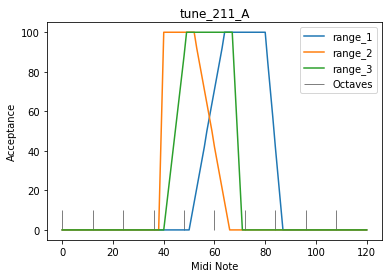

In [83]:
######---  Main  ---######
midi_file_name = gen_midi()

midi_play(midi_file_name)
midi_audio(midi_file_name)
midi_png(midi_file_name)

## External __Music_Generation__ library
This library changes from version to version. New or changed code is first explaind above. This is a copy of music_generation.py 